The following file demonstrates the log data visualization code used in our research:

**Imputation of missing values in well log data using k-nearest neighbor collaborative filtering**

The following python libraries are utilized in our research:

*   NumPy
*   Pandas
*   Matplotlib
*   Scikit-Learn



Important to Note:
* Run each cell sequentially unless stated otherwise
* Some cells may take long time to run


In [1]:
# Import all needed python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


# To ignore warnings (not needed)
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
# Import DF and Combine data_set
df_1 = pd.read_csv('CSV_train.csv', sep=';') # Change file address if nescessary
df_2 = pd.read_csv('CSV_hidden_test.csv', sep=';') # Change file address if nescessary)


df_total = pd.concat([df_1, df_2])
df_total = df_total.reset_index(drop=True)

In [3]:
# Add "True Vertical Depth (TVD)" column

df_total['DEPTH_TVD'] = df_total['Z_LOC'] * -1
column_to_move = df_total.pop('DEPTH_TVD')
df_total.insert(2, 'DEPTH_TVD', column_to_move)

The following cell makes adjustments of the lithology column for a more convenient analysis.

Original data contains 12 lithology, but our research assumes only 11. "Basement" lithology has been removed as it is a very small portion in the dataset.

In [4]:
# Convert Facies Number Label to Appropriate Lithology Label
lithology_numbers = {
                 30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12
                 }

df_total=df_total.replace({"FORCE_2020_LITHOFACIES_LITHOLOGY": lithology_numbers})

lithology_type = {
                 0: 'Sandstone',
                 1: 'ShalySand',
                 2: 'Shale',
                 3: 'Marl',
                 4: 'Dolomite',
                 5: 'Limestone',
                 6: 'Chalk',
                 7: 'Halite',
                 8: 'Anhydrite',
                 9: 'Tuff',
                 10: 'Coal',
                 11: 'Basement'
                 }

df_total['Lithology_Type'] = df_total['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_type)

# Drop basement lithology
df_total  = df_total[df_total['Lithology_Type'] != 'Basement']

# ***** Search Single Well *****

*   There are total of 108 wells in this dataset
*   Insert Well Label that you want to use



In [5]:
single_well_total_df = df_total.groupby('WELL')

In [6]:
# Well Numbers
df_total['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

In [7]:
single_well = single_well_total_df.get_group("35/11-7") # change well number and run cell sequentially

# Full Well Log Data Visualization

In [8]:
# Convert columns with all NAN values to -9999

nan_columns_df = single_well.loc[:, single_well.isnull().all()]
nan_columns_df = nan_columns_df.fillna(-9999)


for column in nan_columns_df.columns:
  single_well[column] = nan_columns_df[column].values

In [9]:
## Color Code Applies to All Wells

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

facies_color_map = { 'Sandstone': '#F4D03F',
                      'Shale Sandy': '#7ccc19',
                      'Shale': '#196F3D',
                      'Marl': '#160599',
                      'Dolomite': '#FF8C00',
                      'Limestone': '#696969',
                      'Chalk': '#D2B48C',
                      'Halite': '#87039e',
                      'Anhydrite': '#ec90fc',
                      'Tuff': '#FF4500',
                      'Coal': '#000000'
                      }


# get a list of the color codes.
facies_colors_total = [facies_color_map[mykey] for mykey in facies_color_map.keys()]



from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors


def log_data_mini(well, top_depth, bottom_depth, facies_colors):
  well = well.sort_values(by='DEPTH_MD')
  fig, ax = plt.subplots(figsize=(40,30))

  bottom_depth = int(bottom_depth)
  top_depth = int(top_depth)

  #Set up the plot axes
  ax1 = plt.subplot2grid((1,10), (0,0), rowspan=1, colspan = 1) # GR, Caliper, SP, BS Track
  ax2 = plt.subplot2grid((1,10), (0,1), rowspan=1, colspan = 1, sharey = ax1) # RSHA, RMED, RDEP, RXO, RMIC Track
  ax3 = plt.subplot2grid((1,10), (0,2), rowspan=1, colspan = 1, sharey = ax1) # RHOB, NPHI, DTC, DTS Track
  ax4 = plt.subplot2grid((1,10), (0,3), rowspan=1, colspan = 1, sharey = ax1) # SGR
  ax5 = plt.subplot2grid((1,10), (0,4), rowspan=1, colspan = 1, sharey = ax1) # DCAL
  ax6 = plt.subplot2grid((1,10), (0,5), rowspan=1, colspan = 1, sharey = ax1) # PEF
  ax7 = plt.subplot2grid((1,10), (0,6), rowspan=1, colspan = 1, sharey = ax1) # DRHO
  ax8 = plt.subplot2grid((1,10), (0,7), rowspan=1, colspan = 1, sharey = ax1) # ROP, ROPA
  ax9 = plt.subplot2grid((1,10), (0,8), rowspan=1, colspan = 1, sharey = ax1) # MUDWEIGHT
  ax100 = plt.subplot2grid((1,10), (0,9), rowspan=1, colspan = 1, sharey = ax1) # Lithology


  ax13 = ax1.twiny() # Caliper Track on top of GR Track
  ax14 = ax1.twiny() # SP Track on top of GR, CALI Track
  ax15 = ax1.twiny() # BS Track on top of GR, CALI Track
  ax16 = ax2.twiny() # RMED Track on top of RSHA Track
  ax17 = ax2.twiny() # RDEP Track on top of RMED,RSHA Track
  ax18 = ax2.twiny() # RXO
  ax19 = ax2.twiny() # RMIC
  ax20 = ax3.twiny() # NPHI Track on top of RHOB Track
  ax21 = ax3.twiny() # DTC Track on top of RHOB, NPHI Track
  ax22 = ax3.twiny() # DTS
  ax23 = ax8.twiny() # ROPA on ROP

  # As our curve scales will be detached from the top of the track, this code adds the top border back in without dealing with splines
  ax24 = ax1.twiny()
  ax24.xaxis.set_visible(False)
  ax25 = ax2.twiny()
  ax25.xaxis.set_visible(False)
  ax26 = ax3.twiny()
  ax26.xaxis.set_visible(False)
  ax27 = ax4.twiny()
  ax27.xaxis.set_visible(False)
  ax28 = ax5.twiny()
  ax28.xaxis.set_visible(False)
  ax29 = ax6.twiny()
  ax29.xaxis.set_visible(False)
  ax30 = ax7.twiny()
  ax30.xaxis.set_visible(False)
  ax31 = ax8.twiny()
  ax31.xaxis.set_visible(False)
  ax32 = ax9.twiny()
  ax32.xaxis.set_visible(False)
  ax101 = ax100.twiny()
  ax101.xaxis.set_visible(False)

##################################################################################################################################

  # Gamma Ray track
  ax1.plot(well["GR"], well['DEPTH_TVD'], color = "brown", linewidth = 1.5)
  ax1.set_xlabel("GR", fontsize=20)
  ax1.xaxis.label.set_color("brown")
  ax1.set_xlim(0, 150)
  ax1.set_ylabel("Depth (m)", fontsize=30)
  ax1.tick_params(axis='x', colors="brown")
  ax1.spines["top"].set_edgecolor("brown")
  ax1.title.set_color('brown')
  ax1.set_xticks([0,  150])
  ax1.set_yticks(np.arange(top_depth, bottom_depth, 100))
  ax1.tick_params(axis='x', which='major', labelsize=15)
  ax1.tick_params(axis='y', which='major', labelsize=30)


  # Caliper placed on top of Gamma Ray
  ax13.plot(well["CALI"], well['DEPTH_TVD'], color = "orange", linewidth = 0.8)
  ax13.set_xlabel('CALI', fontsize=20)
  ax13.xaxis.label.set_color("orange")
  ax13.set_xlim(6,16)
  ax13.tick_params(axis='x', colors="orange")
  ax13.spines["top"].set_position(("axes", 1.055))
  ax13.spines["top"].set_visible(True)
  ax13.spines["top"].set_edgecolor("orange")
  ax13.set_xticks([6,16])
  ax13.tick_params(axis='x', which='major', labelsize=15)

  # SP placed on top of Gamma Ray
  ax14.plot(well["SP"], well['DEPTH_TVD'], color = "mediumpurple", linewidth = 1.5)
  ax14.set_xlabel('SP', fontsize=20)
  ax14.xaxis.label.set_color("mediumpurple")
  ax14.set_xlim(-160,40)
  ax14.tick_params(axis='x', colors="mediumpurple")
  ax14.spines["top"].set_position(("axes", 1.03))
  ax14.spines["top"].set_visible(True)
  ax14.spines["top"].set_edgecolor("mediumpurple")
  ax14.set_xticks([-160,40])
  ax14.tick_params(axis='x', which='major', labelsize=15)

 # BS Track
  ax15.plot(well["BS"], well['DEPTH_TVD'], color = "black", linestyle='dashed', linewidth = 0.8)
  ax15.set_xlabel("BS", fontsize=20)
  ax15.xaxis.label.set_color("black")
  ax15.set_xlim(0, 42)
  ax15.tick_params(axis='x', colors="black")
  ax15.spines["top"].set_position(("axes", 1.08))
  ax15.spines["top"].set_edgecolor("black")
  ax15.title.set_color('black')
  ax15.set_xticks([0, 42])
  ax15.tick_params(axis='x', which='major', labelsize=15)

####################################################################################################################################


  # RSHA track
  ax2.plot(well["RSHA"], well['DEPTH_TVD'], color = "indigo", linewidth = 1)
  ax2.set_xlabel("RSHA", fontsize=20)
  ax2.xaxis.label.set_color("indigo")
  ax2.set_xlim(0.2, 100)
  ax2.tick_params(axis='x', colors="indigo")
  ax2.spines["top"].set_edgecolor("indigo")
  ax2.title.set_color('indigo')
  ax2.set_xticks([0.2, 100])
  ax2.tick_params(axis='x', which='major', labelsize=15)

  #RMED placed on top of RSHA
  ax16.plot(well["RMED"], well['DEPTH_TVD'], color = "blue", linestyle='dashed', linewidth = 1)
  ax16.set_xlabel('RMED', fontsize=20)
  ax16.xaxis.label.set_color("blue")
  ax16.set_xlim(0.2, 100)
  ax16.tick_params(axis='x', colors="blue")
  ax16.spines["top"].set_position(("axes", 1.03))
  ax16.spines["top"].set_visible(True)
  ax16.spines["top"].set_edgecolor("blue")
  ax16.set_xticks([0.2, 100])
  ax16.tick_params(axis='x', which='major', labelsize=15)

  #RDEP placed on top of RMED
  ax17.plot(well["RDEP"], well['DEPTH_TVD'], color = "darkorange", linestyle='dashed', linewidth = 1)
  ax17.set_xlabel('RDEP', fontsize=20)
  ax17.xaxis.label.set_color("darkorange")
  ax17.set_xlim(0.2, 100)
  ax17.tick_params(axis='x', colors="darkorange")
  ax17.spines["top"].set_position(("axes", 1.055))
  ax17.spines["top"].set_visible(True)
  ax17.spines["top"].set_edgecolor("darkorange")
  ax17.set_xticks([0.2, 100])
  ax17.tick_params(axis='x', which='major', labelsize=15)

  #RXO placed on top of RDEP
  ax18.plot(well["RXO"], well['DEPTH_TVD'], color = "darkred", linestyle='dashed', linewidth = 1)
  ax18.set_xlabel('RXO', fontsize=20)
  ax18.xaxis.label.set_color("darkred")
  ax18.set_xlim(0.2, 100)
  ax18.tick_params(axis='x', colors="darkred")
  ax18.spines["top"].set_position(("axes", 1.08))
  ax18.spines["top"].set_visible(True)
  ax18.spines["top"].set_edgecolor("darkred")
  ax18.set_xticks([0.2, 100])
  ax18.tick_params(axis='x', which='major', labelsize=15)

  #RMIC placed on top of RXO
  ax19.plot(well["RXO"], well['DEPTH_TVD'], color = "darkgoldenrod", linestyle='dashed', linewidth = 0.8)
  ax19.set_xlabel('RXO', fontsize=20)
  ax19.xaxis.label.set_color("darkgoldenrod")
  ax19.set_xlim(0.2, 100)
  ax19.tick_params(axis='x', colors="darkgoldenrod")
  ax19.spines["top"].set_position(("axes", 1.105))
  ax19.spines["top"].set_visible(True)
  ax19.spines["top"].set_edgecolor("darkgoldenrod")
  ax19.set_xticks([0.2, 100])
  ax19.tick_params(axis='x', which='major', labelsize=15)

#######################################################################################################################################

  # RHOB track
  ax3.plot(well["RHOB"], well['DEPTH_TVD'], color = "red", linewidth = 1.5)
  ax3.set_xlabel("RHOB", fontsize=20)
  ax3.xaxis.label.set_color("red")
  ax3.set_xlim(1.95, 2.95)
  ax3.xaxis.label.set_color("red")
  ax3.tick_params(axis='x', colors="red")
  ax3.spines["top"].set_edgecolor("red")
  ax3.set_xticks([1.95, 2.95])
  ax3.tick_params(axis='x', which='major', labelsize=15)


  # NPHI track placed ontop of RHOB track
  ax20.plot(well["NPHI"], well['DEPTH_TVD'], color = "blue", linewidth = 1.5)
  ax20.set_xlabel('NPHI', fontsize=20)
  ax20.xaxis.label.set_color("blue")
  ax20.set_xlim(0.45, -0.15)
  ax20.tick_params(axis='x', colors="blue")
  ax20.spines["top"].set_position(("axes", 1.03))
  ax20.spines["top"].set_visible(True)
  ax20.spines["top"].set_edgecolor("blue")
  ax20.set_xticks([0.45, -0.15])
  ax20.tick_params(axis='x', which='major', labelsize=15)


  # DTC track placed ontop of density,neutron track
  ax21.plot(well["DTC"], well['DEPTH_TVD'], color = "purple", linewidth = 1.5)
  ax21.set_xlabel('DTC', fontsize=20)
  ax21.xaxis.label.set_color("purple")
  ax21.set_xlim(240, 40)
  ax21.tick_params(axis='x', colors="purple")
  ax21.spines["top"].set_visible(True)
  ax21.spines["top"].set_edgecolor("purple")
  ax21.set_xticks([240,40])
  ax21.spines["top"].set_position(("axes", 1.055))
  ax21.tick_params(axis='x', which='major', labelsize=15)


  # DTS track placed ontop of density,neutron track
  ax22.plot(well["DTS"], well['DEPTH_TVD'], color = "forestgreen", linewidth = 1.5)
  ax22.set_xlabel('DTS', fontsize=20)
  ax22.xaxis.label.set_color("forestgreen")
  ax22.set_xlim(240, 40)
  ax22.tick_params(axis='x', colors="forestgreen")
  ax22.spines["top"].set_visible(True)
  ax22.spines["top"].set_edgecolor("forestgreen")
  ax22.set_xticks([240,40])
  ax22.spines["top"].set_position(("axes", 1.08))
  ax22.tick_params(axis='x', which='major', labelsize=15)

###########################################################################################################################################################

  # SGR Track
  ax4.plot(well["SGR"], well['DEPTH_TVD'], color = "firebrick", linewidth = 1.5)
  ax4.set_xlabel("SGR", fontsize=20)
  ax4.xaxis.label.set_color("firebrick")
  ax4.set_xlim(0, 1)
  ax4.tick_params(axis='x', colors="firebrick")
  ax4.spines["top"].set_edgecolor("firebrick")
  ax4.title.set_color('firebrick')
  ax4.set_xticks([0,  1])
  ax4.tick_params(axis='x', which='major', labelsize=15)

###########################################################################################################################################################

 # DCAL Track
  ax5.plot(well["DCAL"], well['DEPTH_TVD'], color = "darkorange", linewidth = 0.8)
  ax5.set_xlabel("DCAL", fontsize=20)
  ax5.xaxis.label.set_color("darkorange")
  ax5.set_xlim(0, 10)
  ax5.tick_params(axis='x', colors="darkorange")
  ax5.spines["top"].set_edgecolor("darkorange")
  ax5.title.set_color('darkorange')
  ax5.set_xticks([0, 10])
  ax5.tick_params(axis='x', which='major', labelsize=15)

###########################################################################################################################################################

 # PEF Track
  ax6.plot(well["PEF"], well['DEPTH_TVD'], color = "crimson", linewidth = 1.5)
  ax6.set_xlabel("PEF", fontsize=20)
  ax6.xaxis.label.set_color("crimson")
  ax6.set_xlim(0, 10)
  ax6.tick_params(axis='x', colors="crimson")
  ax6.spines["top"].set_edgecolor("crimson")
  ax6.title.set_color('crimson')
  ax6.set_xticks([0, 10])
  ax6.tick_params(axis='x', which='major', labelsize=15)

###########################################################################################################################################################

 # DRHO Track
  ax7.plot(well["DRHO"], well['DEPTH_TVD'], color = "orangered", linewidth = 1.5)
  ax7.set_xlabel("DRHO", fontsize=20)
  ax7.xaxis.label.set_color("orangered")
  ax7.set_xlim(-0.8, 0.2)
  ax7.tick_params(axis='x', colors="orangered")
  ax7.spines["top"].set_edgecolor("orangered")
  ax7.title.set_color('orangered')
  ax7.set_xticks([-0.8, 0.2])
  ax7.tick_params(axis='x', which='major', labelsize=15)

###########################################################################################################################################################

 # ROP Track
  ax8.plot(well["ROP"], well['DEPTH_TVD'], color = "orangered", linewidth = 1.5)
  ax8.set_xlabel("ROP", fontsize=20)
  ax8.xaxis.label.set_color("orangered")
  ax8.set_xlim(0, 200)
  ax8.tick_params(axis='x', colors="orangered")
  ax8.spines["top"].set_edgecolor("orangered")
  ax8.title.set_color('orangered')
  ax8.set_xticks([0, 200])
  ax8.tick_params(axis='x', which='major', labelsize=15)

 # ROPA Track
  ax23.plot(well["ROPA"], well['DEPTH_TVD'], color = "coral", linestyle='dashed', linewidth = 1.5)
  ax23.set_xlabel("ROPA", fontsize=20)
  ax23.xaxis.label.set_color("coral")
  ax23.set_xlim(0.55, 75.85)
  ax23.tick_params(axis='x', colors="coral")
  ax23.spines["top"].set_position(("axes", 1.03))
  ax23.spines["top"].set_edgecolor("coral")
  ax23.title.set_color('coral')
  ax23.set_xticks([0.55, 75.85])
  ax23.tick_params(axis='x', which='major', labelsize=15)



###########################################################################################################################################################

 # MUDWEIGHT Track
  ax9.plot(well["MUDWEIGHT"], well['DEPTH_TVD'], color = "saddlebrown", linewidth = 1.5)
  ax9.set_xlabel("MUDWEIGHT", fontsize=20)
  ax9.xaxis.label.set_color("saddlebrown")
  ax9.set_xlim(0.12, 0.17)
  ax9.tick_params(axis='x', colors="saddlebrown")
  ax9.spines["top"].set_edgecolor("saddlebrown")
  ax9.title.set_color('saddlebrown')
  ax9.set_xticks([0.12, 0.17])
  ax9.tick_params(axis='x', which='major', labelsize=15)

###########################################################################################################################################################


 # Lithology Track

  ax100.plot(well["FORCE_2020_LITHOFACIES_LITHOLOGY"], well['DEPTH_TVD'], color = "black", linewidth = 0.5)
  ax100.set_xlabel("LITHOLOGY", fontsize=20)
  ax100.xaxis.label.set_color("black")
  ax100.set_xlim(0, 12)
  ax100.tick_params(axis='x', colors="black")
  ax100.spines["top"].set_edgecolor("black")
  ax100.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
  ax100.tick_params(axis='x', which='major', labelsize=15)
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==1), facecolor='#F4D03F')
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==2), facecolor='#7ccc19')
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==3), facecolor='#196F3D')
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==4), facecolor='#160599')
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==5), facecolor='#FF8C00')
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==6), facecolor='#696969')
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==7), facecolor='#D2B48C')
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==8), facecolor='#87039e')
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==9), facecolor='#ec90fc')
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==10), facecolor='#FF4500')
  ax100.fill_betweenx(well['DEPTH_TVD'], well["FORCE_2020_LITHOFACIES_LITHOLOGY"], where=(well["FORCE_2020_LITHOFACIES_LITHOLOGY"]==11), facecolor='#000000')




  from mpl_toolkits.axes_grid1 import make_axes_locatable
  import matplotlib.colors as colors

  cmap_facies = colors.ListedColormap(facies_colors_total[0:len(facies_colors_total)], 'indexed')

  divider = make_axes_locatable(ax100)
  cax = divider.append_axes("right", size="7%", pad="0%")
  sm = plt.cm.ScalarMappable(cmap=cmap_facies)
  cbar=plt.colorbar(sm, cax=cax, ax=ax100)
  cbar.set_label((17*' ').join(['SS', 'Sh-SS', 'Sh', 'ML', 'DM', 'LS', 'Chk', 'HL', 'AnH', 'Tuf', 'Coal']), size= 25)
  cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')





###########################################################################################################################################################


  # Common functions for setting up the plot can be extracted into a for loop. This saves repeating code.
  for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax100]:
      ax.set_ylim(bottom_depth, top_depth)
      ax.grid(which='major', color='lightgrey', linestyle='-')
      ax.xaxis.set_ticks_position("top")
      ax.xaxis.set_label_position("top")
      ax.spines["top"].set_position(("axes", 1.005))


  for ax in [ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax100]:
      plt.setp(ax.get_yticklabels(), visible = False)

  plt.tight_layout()
  fig.subplots_adjust(wspace = 0.25)

In [10]:
# Plot Well Log Graph
import gc # prevent memory loss

log_data_mini(single_well, single_well['DEPTH_TVD'].min(), single_well['DEPTH_TVD'].max(), facies_colors_total)
plt.show()
plt.clf()
plt.close('all')
gc.collect()

72699

# Test Data Visualization

The following codes help to viualize the test data fabrication process demonstrated in "Imputation_WellLog_CF.ipynb"

* Import files "df_labeled_with_features_original.csv" and "df_original_test.csv" that were created from "Imputation_WellLog_CF.ipynb" to continue.

* Import files "df_labeled_with_features_sampling.csv" and "df_sample_test.csv" that were created from "Imputation_WellLog_CF.ipynb" to continue.

In [11]:
# Import files and make necessary adjustments

df_labeled_with_features_original = pd.read_csv('df_labeled_with_features_original.csv') # Change file address if necessary
df_original_test = pd.read_csv('df_original_test.csv') # Change file address if necessary

df_labeled_with_features_original = df_labeled_with_features_original.replace(-9999, np.nan)
df_labeled_with_features_original = df_labeled_with_features_original.drop(columns = ['Unnamed: 0', 'FORCE_2020_LITHOFACIES_LITHOLOGY'])

In [12]:
# Plot Original Data that shows which intervals that will be intentionally removed. 

#Missing Intervals in Well Dictionary
missing_feature_well_depth_dict ={
    '35/11-10': ('RHOB', 2600, 2650),
    '31/3-4': ('RHOB', 2000, 2050),
    '25/11-5': ('RHOB', 1900, 1950),

    '31/2-10': ('NPHI', 1650, 1700),
    '35/11-11': ('NPHI', 3000, 3050),
    '31/6-5': ('NPHI', 1950, 2000),

    '31/2-21 S': ('DTC', 2800, 2850),
    '16/7-6': ('DTC', 2350, 2400),
    '34/7-13': ('DTC', 2800, 2850)
}


def make_mini_log_plot_without_lith(logs):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH_TVD')
    

    ztop=logs['DEPTH_TVD'].min(); zbot=logs['DEPTH_TVD'].max()


    f, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 20))
    ax[0].plot(logs['GR'], logs['DEPTH_TVD'], '-', color='brown')
    ax[1].plot(logs['RHOB'], logs['DEPTH_TVD'], '-', color='r')
    ax[2].plot(logs['NPHI'], logs['DEPTH_TVD'], '-', color='blue')
    ax[3].plot(logs['DTC'], logs['DEPTH_TVD'], '-', color='purple')

    for well_key in missing_feature_well_depth_dict:
      if well_key == logs['WELL'].unique()[0]:
        feature = missing_feature_well_depth_dict.get(well_key)[0]
        sample_top_depth = missing_feature_well_depth_dict.get(well_key)[1]
        sample_bot_depth = missing_feature_well_depth_dict.get(well_key)[2]

        if feature == 'RHOB':
          ax[1].axhline(y=sample_top_depth, color='gray', linestyle='--', linewidth=2)
          ax[1].axhline(y=sample_bot_depth, color='gray', linestyle='--', linewidth=2)
          x = np.arange(logs['RHOB'].min(),logs['RHOB'].max()+0.1,0.1)
          ax[1].fill_between(x, sample_top_depth, sample_bot_depth, color='gray', alpha=.6)

        elif feature == 'NPHI':
          ax[2].axhline(y=sample_top_depth, color='gray', linestyle='--', linewidth=2)
          ax[2].axhline(y=sample_bot_depth, color='gray', linestyle='--', linewidth=2)
          x = np.arange(logs['NPHI'].min(),logs['NPHI'].max()+0.1,0.1)
          ax[2].fill_between(x, sample_top_depth, sample_bot_depth, color='gray', alpha=.6)

        elif feature == 'DTC':
          ax[3].axhline(y=sample_top_depth, color='gray', linestyle='--', linewidth=2)
          ax[3].axhline(y=sample_bot_depth, color='gray', linestyle='--', linewidth=2)
          x = np.arange(logs['DTC'].min(),logs['DTC'].max()+0.1,0.1)
          ax[3].fill_between(x, sample_top_depth, sample_bot_depth, color='gray', alpha=.6)
        else:
          continue
      else:
        continue

    for i in range(len(ax)):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_ylabel('Depth (m)', fontsize=45)
    ax[0].set_xlabel("GR", fontsize=45)
    ax[0].set_xlim(logs['GR'].min(),logs['GR'].max())
    ax[1].set_xlabel("RHOB", fontsize=45)
    ax[1].set_xlim(logs['RHOB'].min(),logs['RHOB'].max())
    ax[2].set_xlabel("NPHI", fontsize=45)
    ax[2].set_xlim(logs['NPHI'].max(),logs['NPHI'].min())
    ax[3].set_xlabel("DTC", fontsize=45)
    ax[3].set_xlim(logs['DTC'].max(),logs['DTC'].min())

    ax[0].tick_params(axis='y', which='major', labelsize=42)

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]);
    ax[0].set_xticklabels([]); ax[1].set_xticklabels([]); ax[2].set_xticklabels([]); ax[3].set_xticklabels([]);

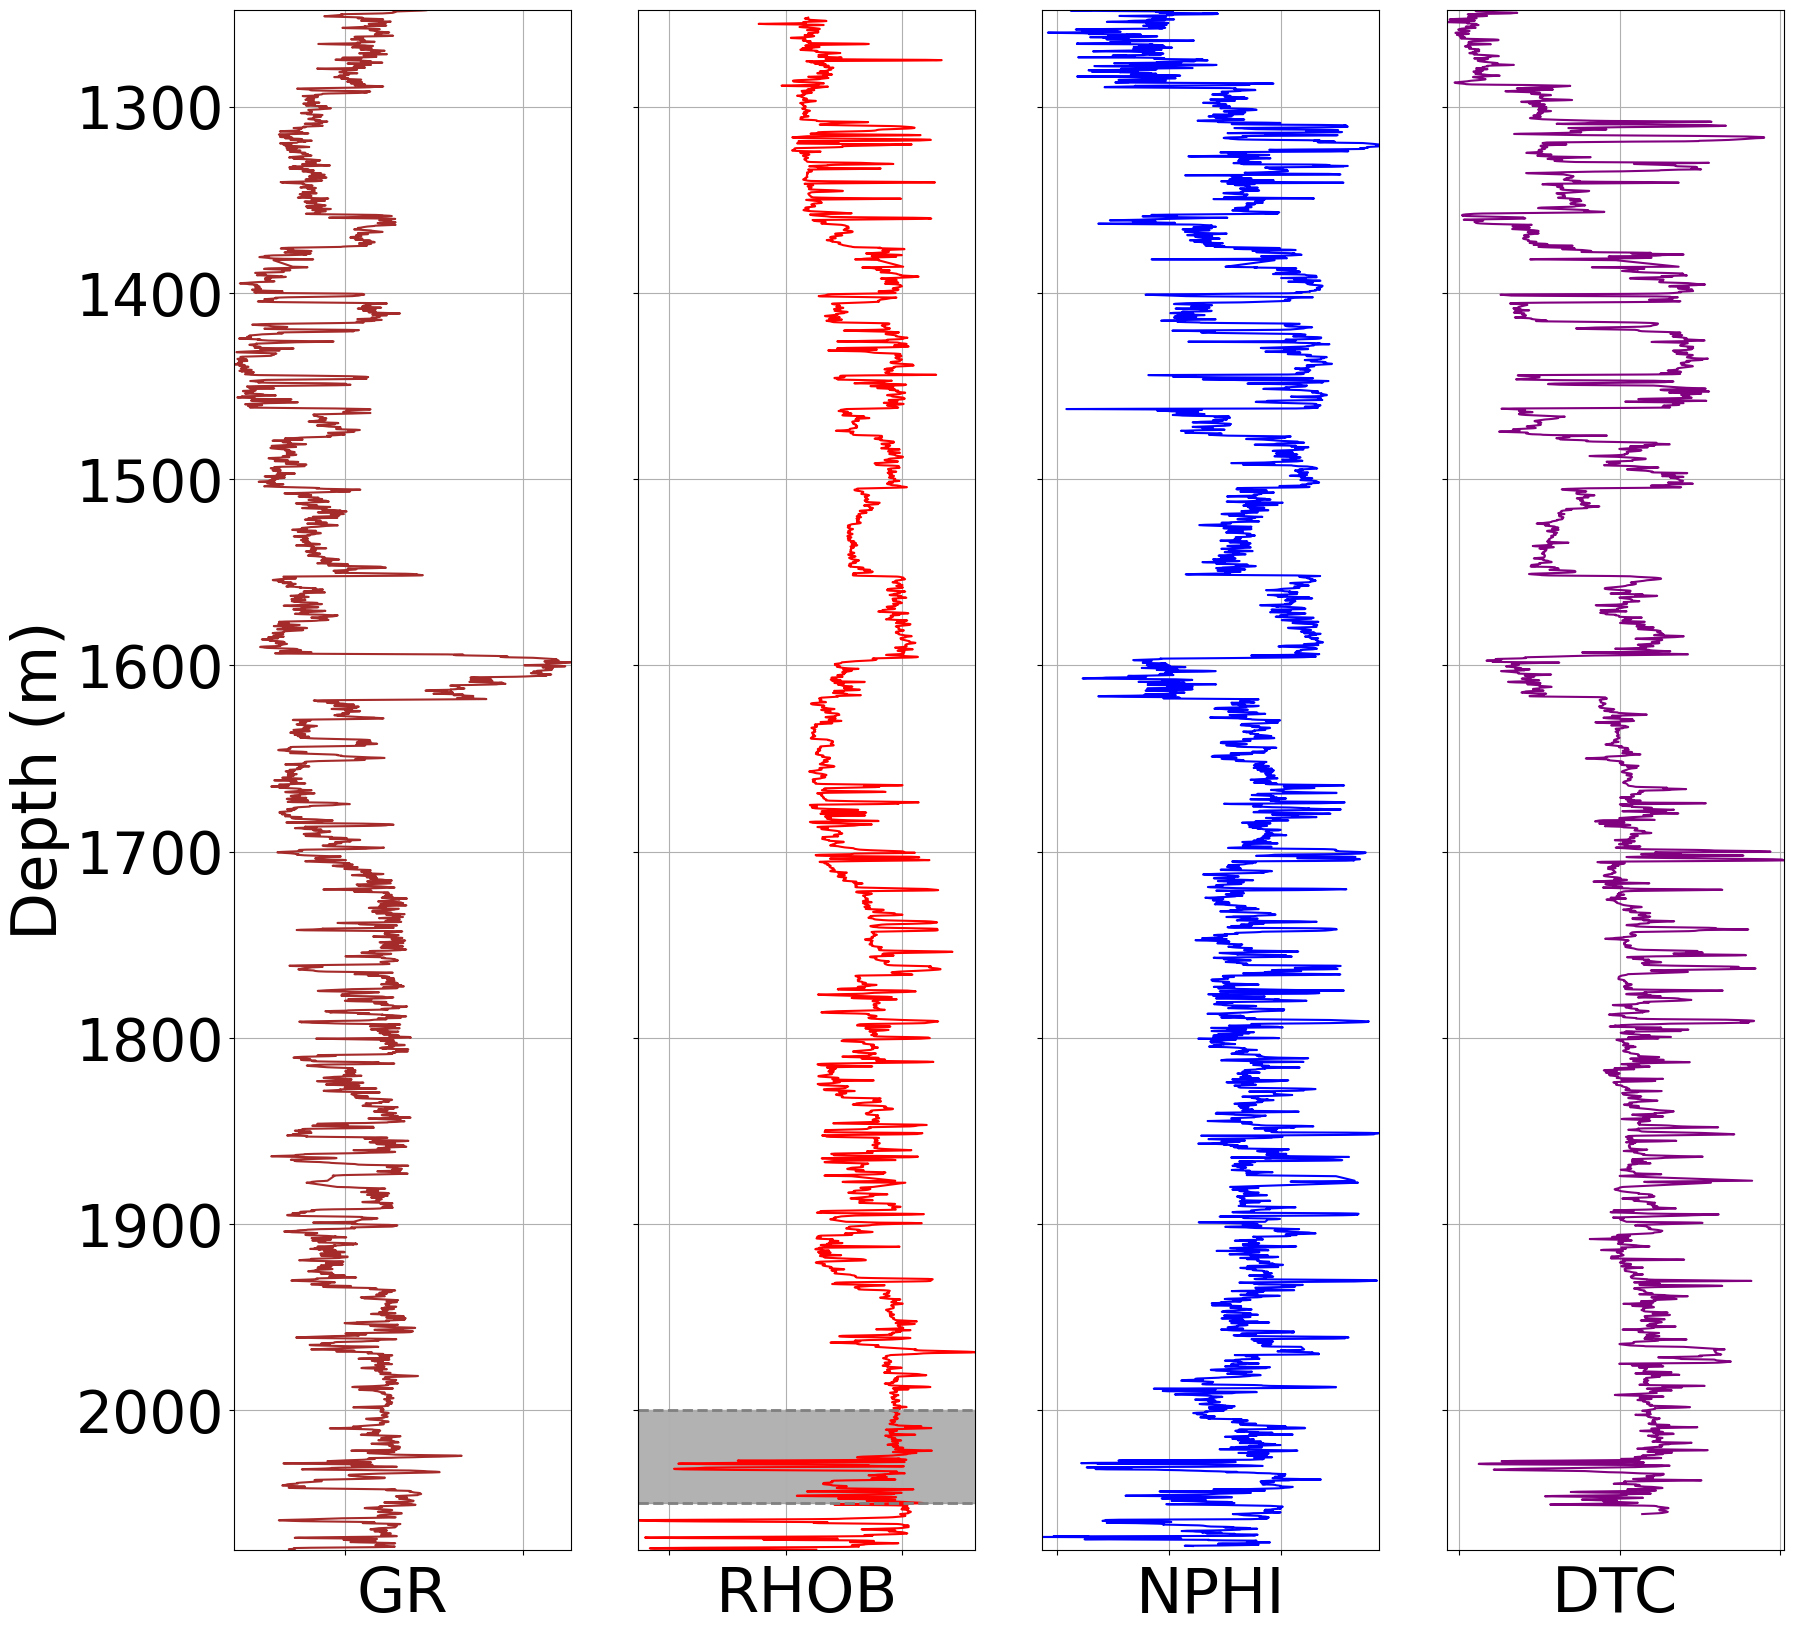

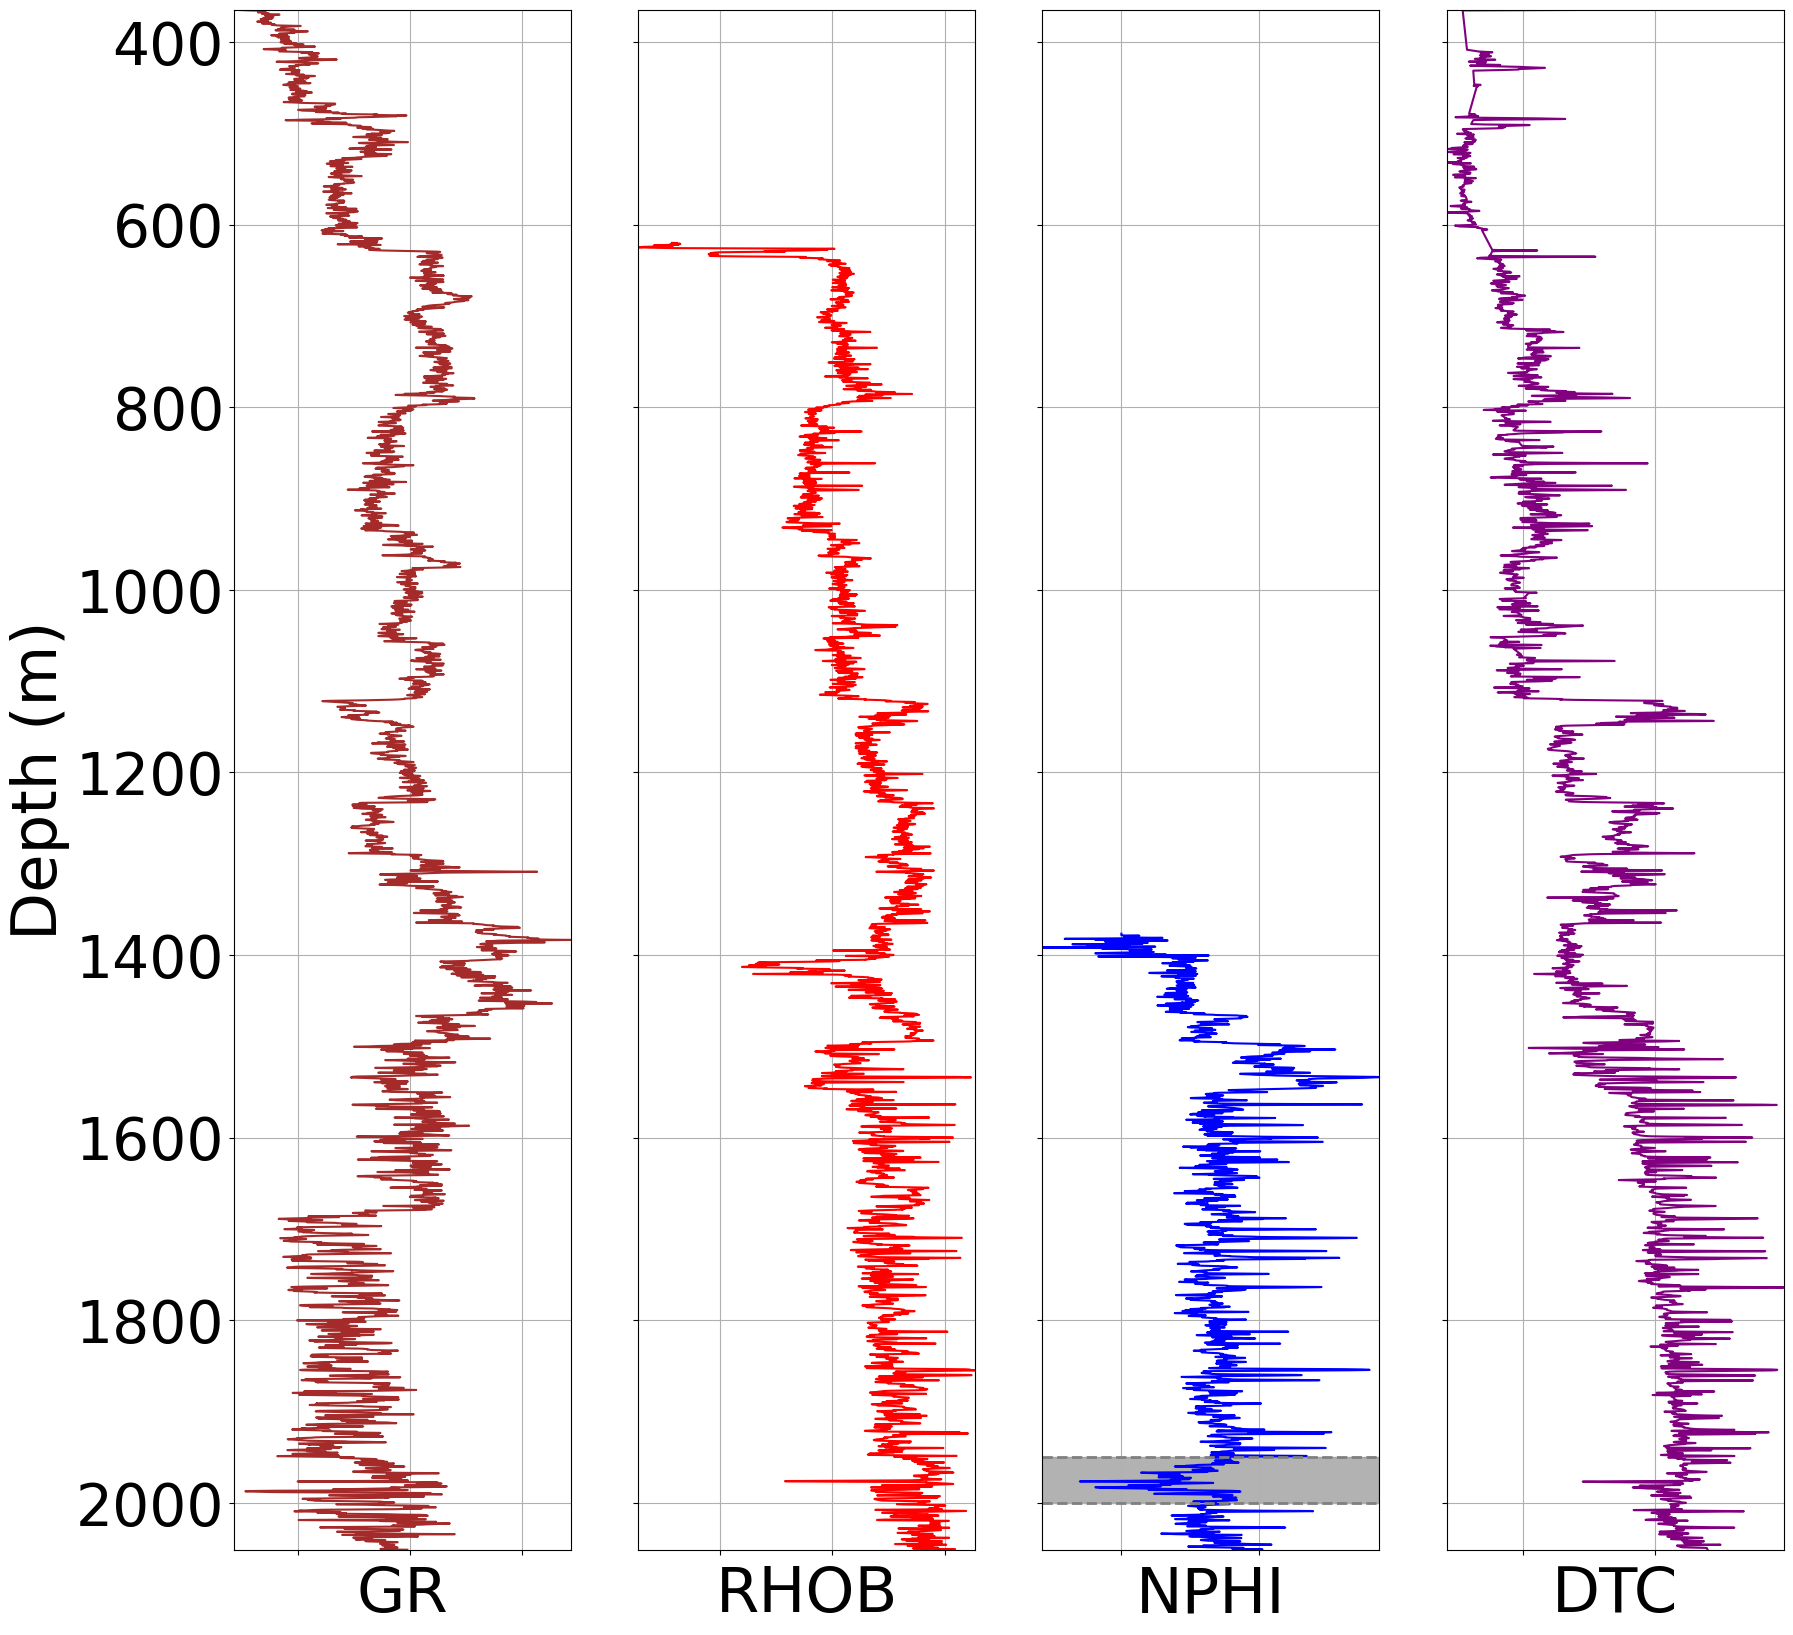

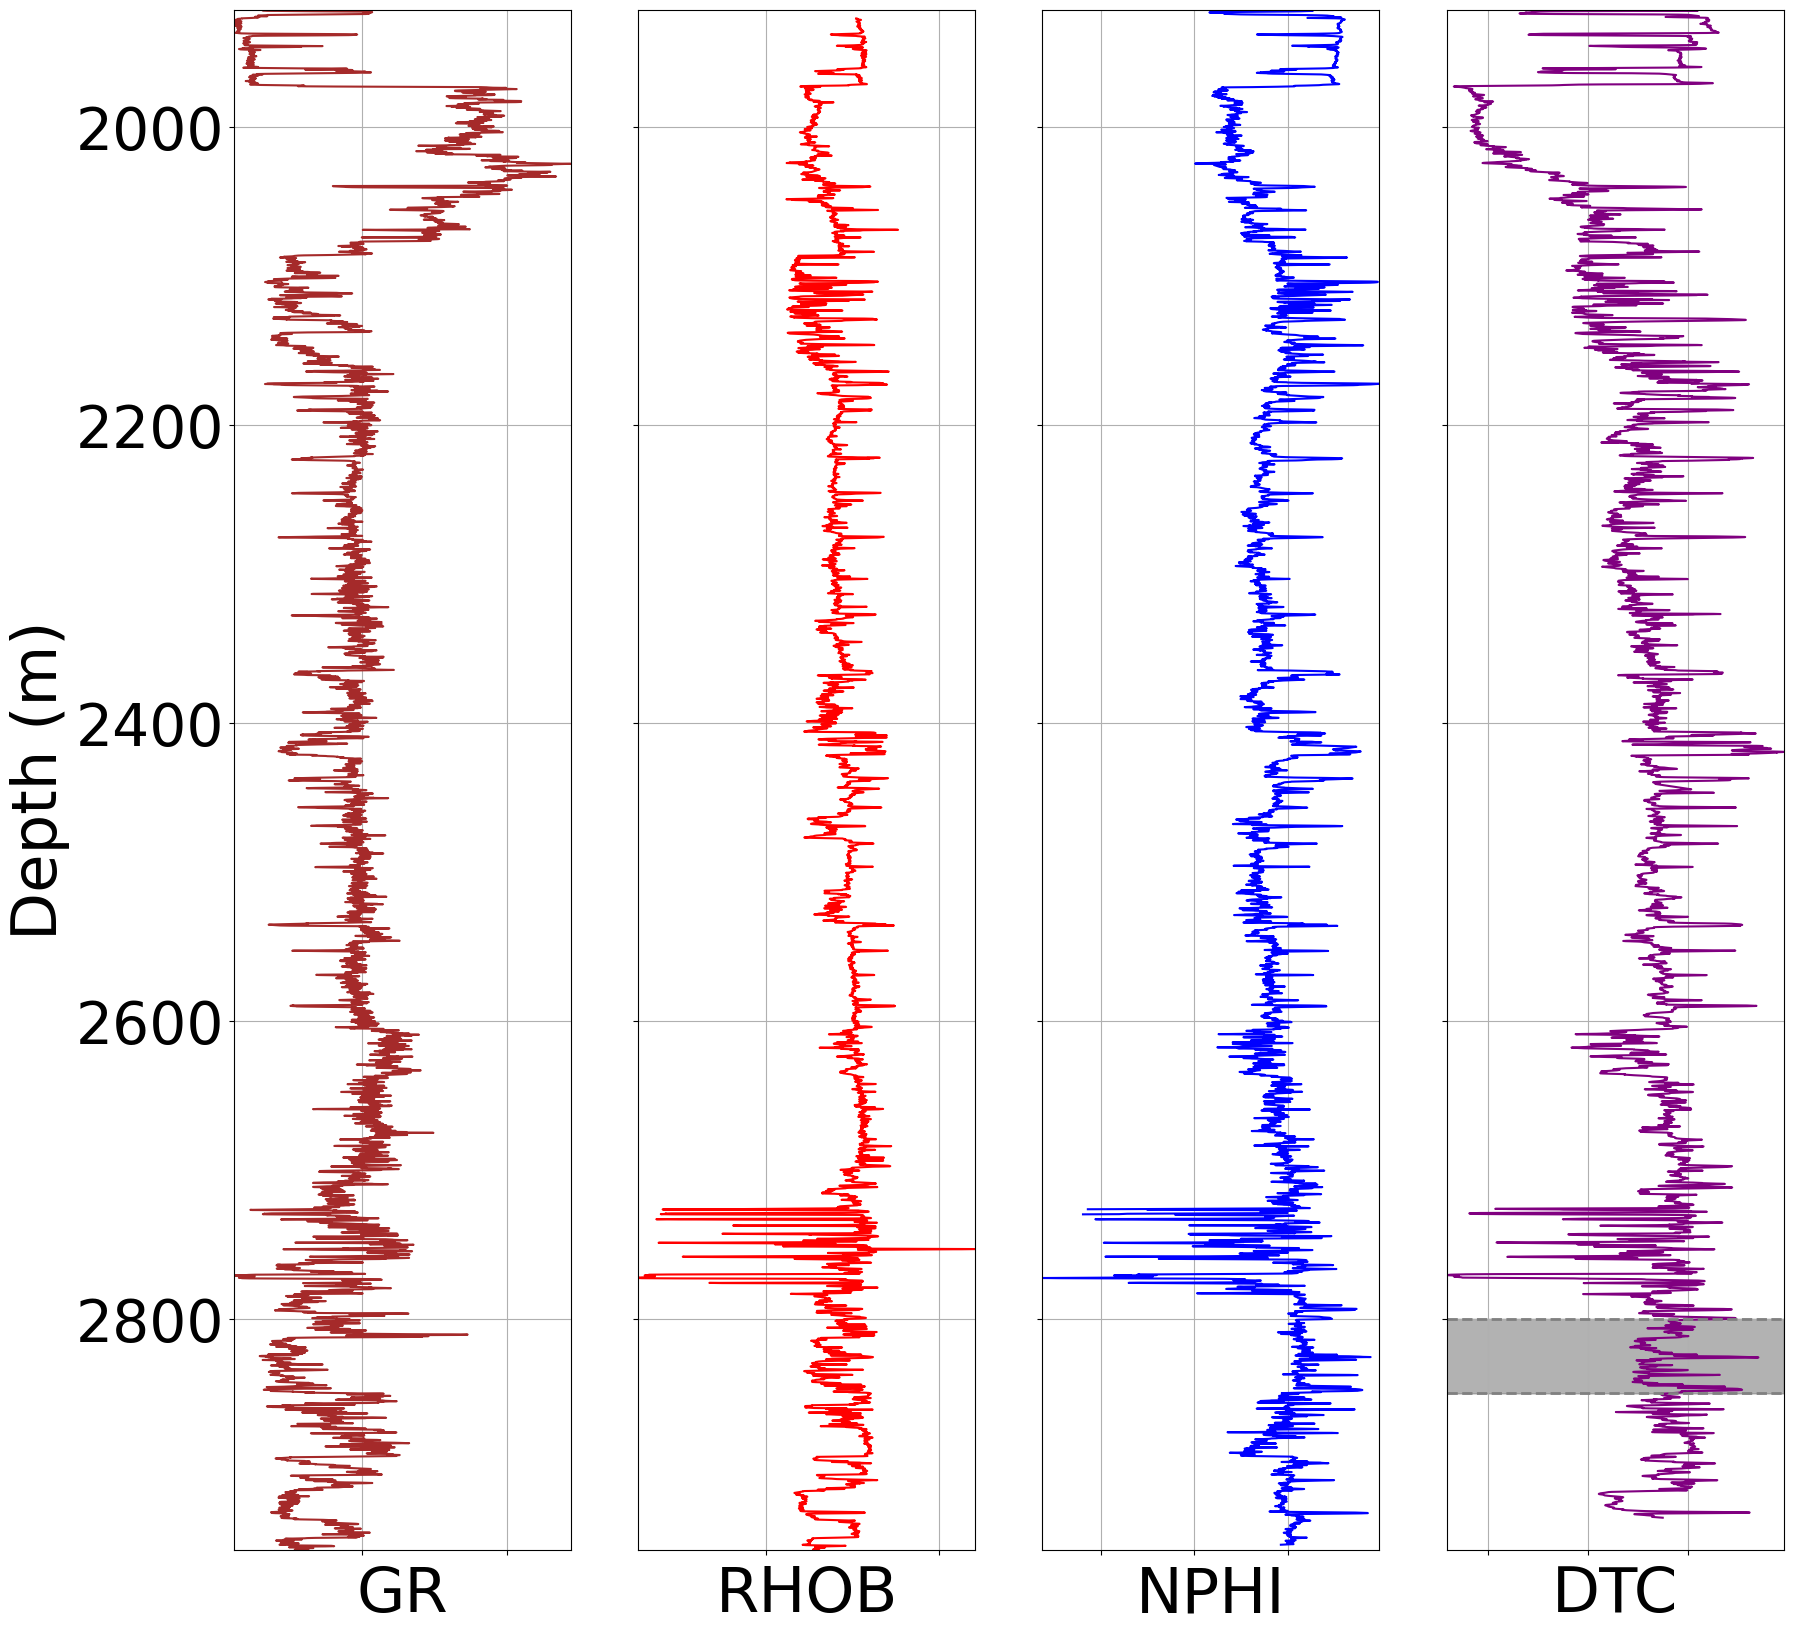

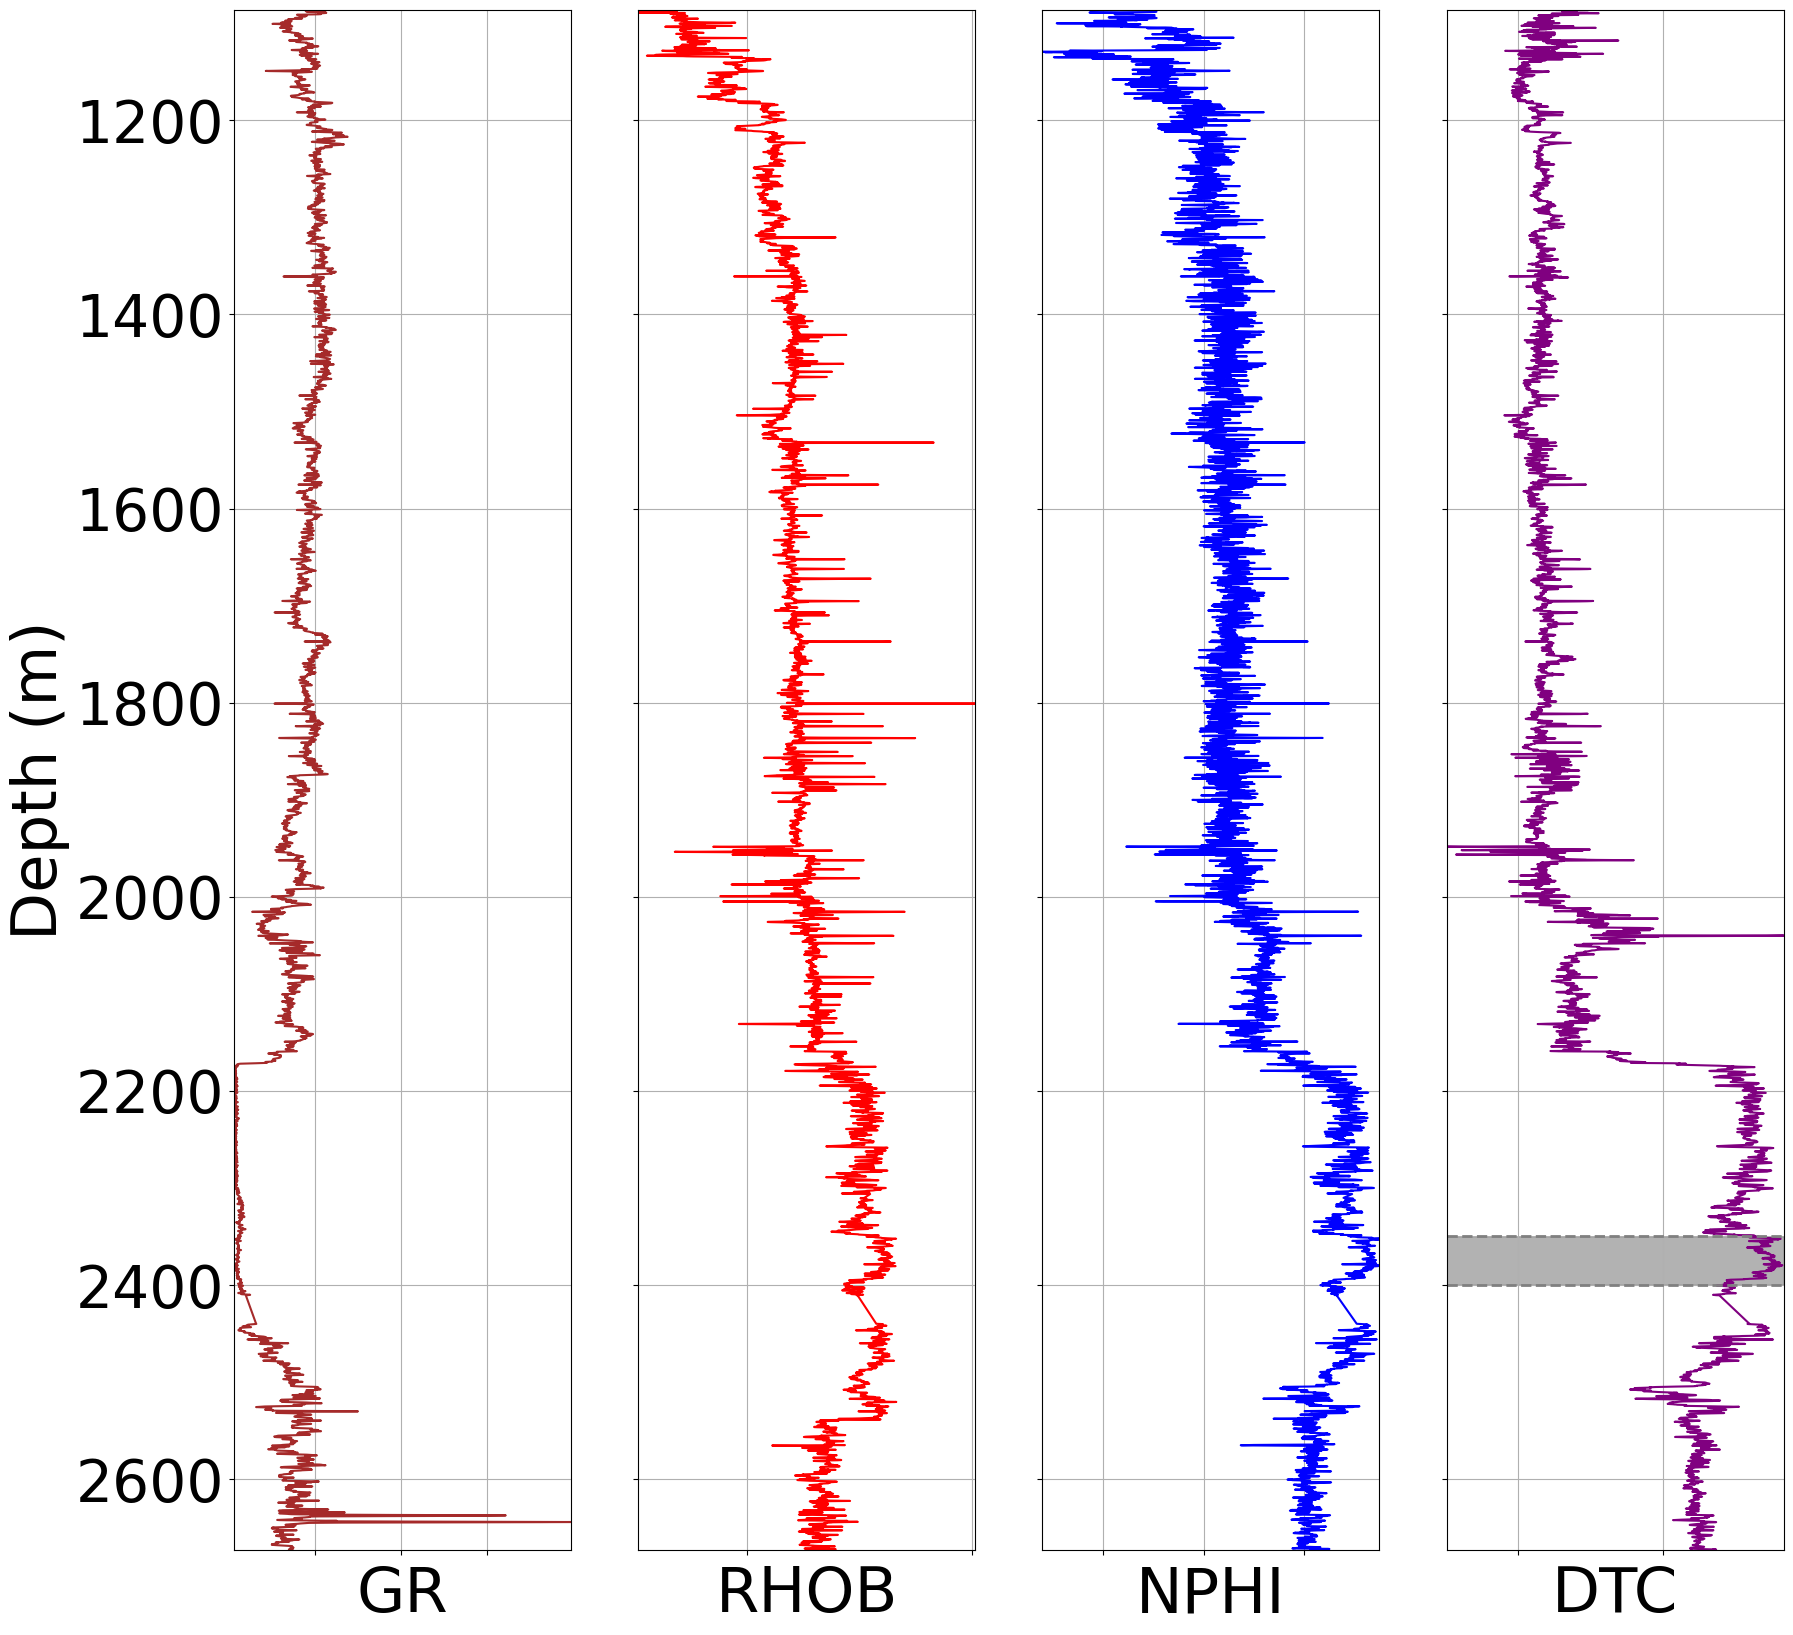

In [13]:
import gc # prevent memory loss

single_well = df_labeled_with_features_original.groupby('WELL')
for well_num in df_original_test.WELL.unique():
    single_well_name = single_well.get_group(well_num)
    single_well_name_reset_index = single_well_name.reset_index(drop=True)
    make_mini_log_plot_without_lith(single_well_name_reset_index)
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()

In [15]:
# Plot Graphs After Removing Chosen Depth Intervals

# Import Files and make necessary adjusments
df_labeled_with_features_sampling = pd.read_csv('df_labeled_with_features_sampling.csv') # Change file address if necessary
df_sample_test = pd.read_csv('df_sample_test.csv') # Change file address if necessary

df_labeled_with_features_sampling = df_labeled_with_features_sampling.replace(-9999, np.nan)
df_labeled_with_features_sampling = df_labeled_with_features_sampling.drop(columns = ['Unnamed: 0', 'FORCE_2020_LITHOFACIES_LITHOLOGY'])

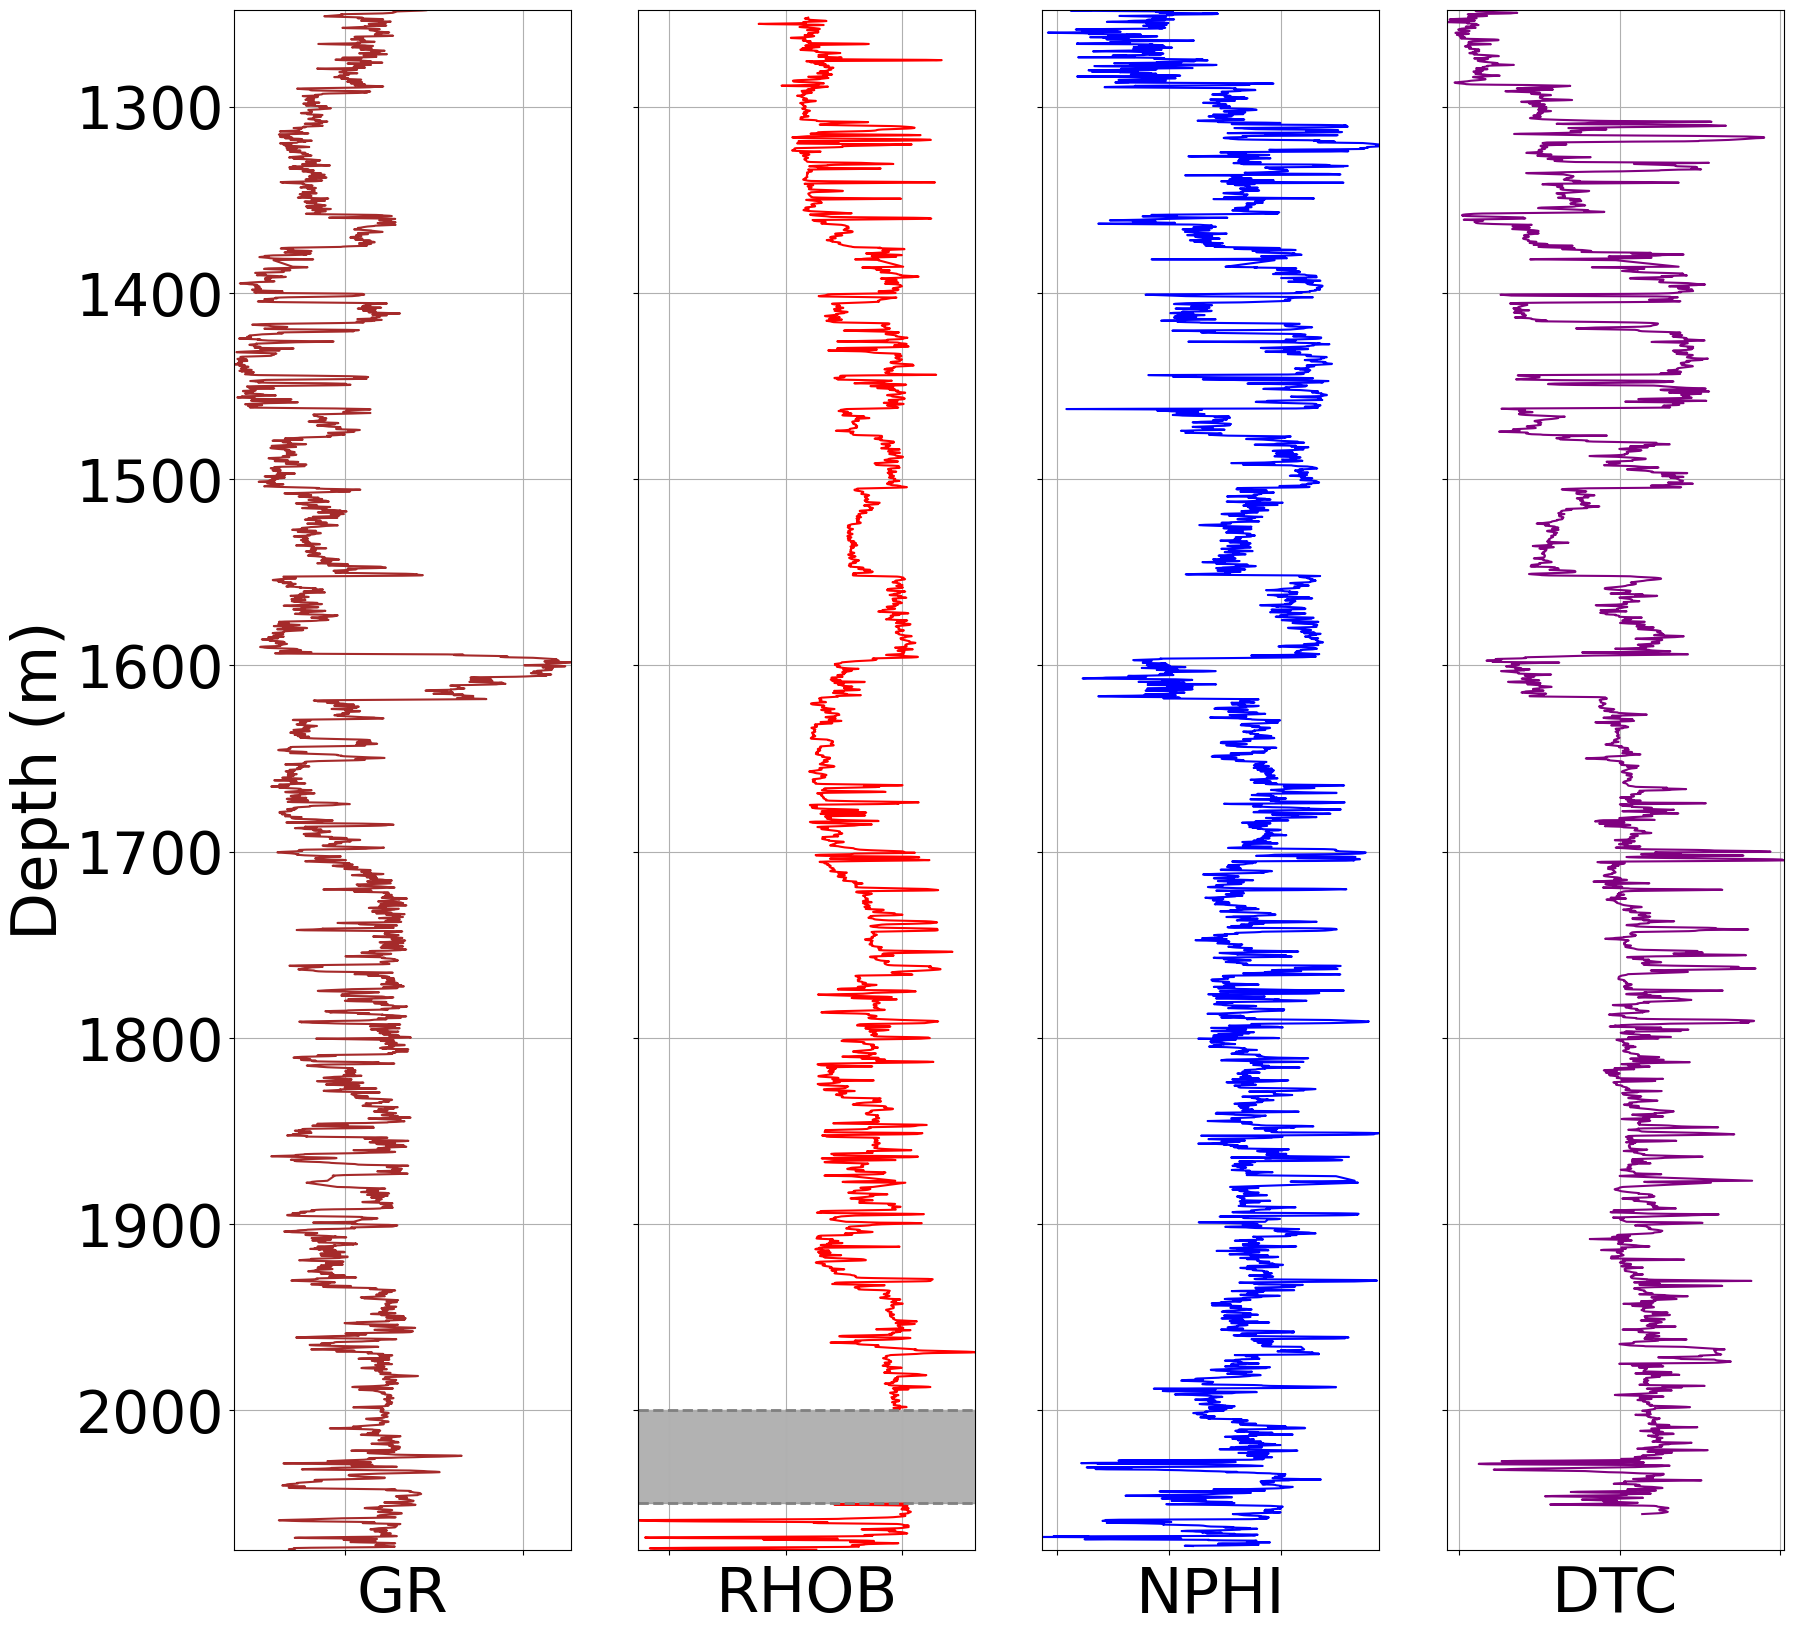

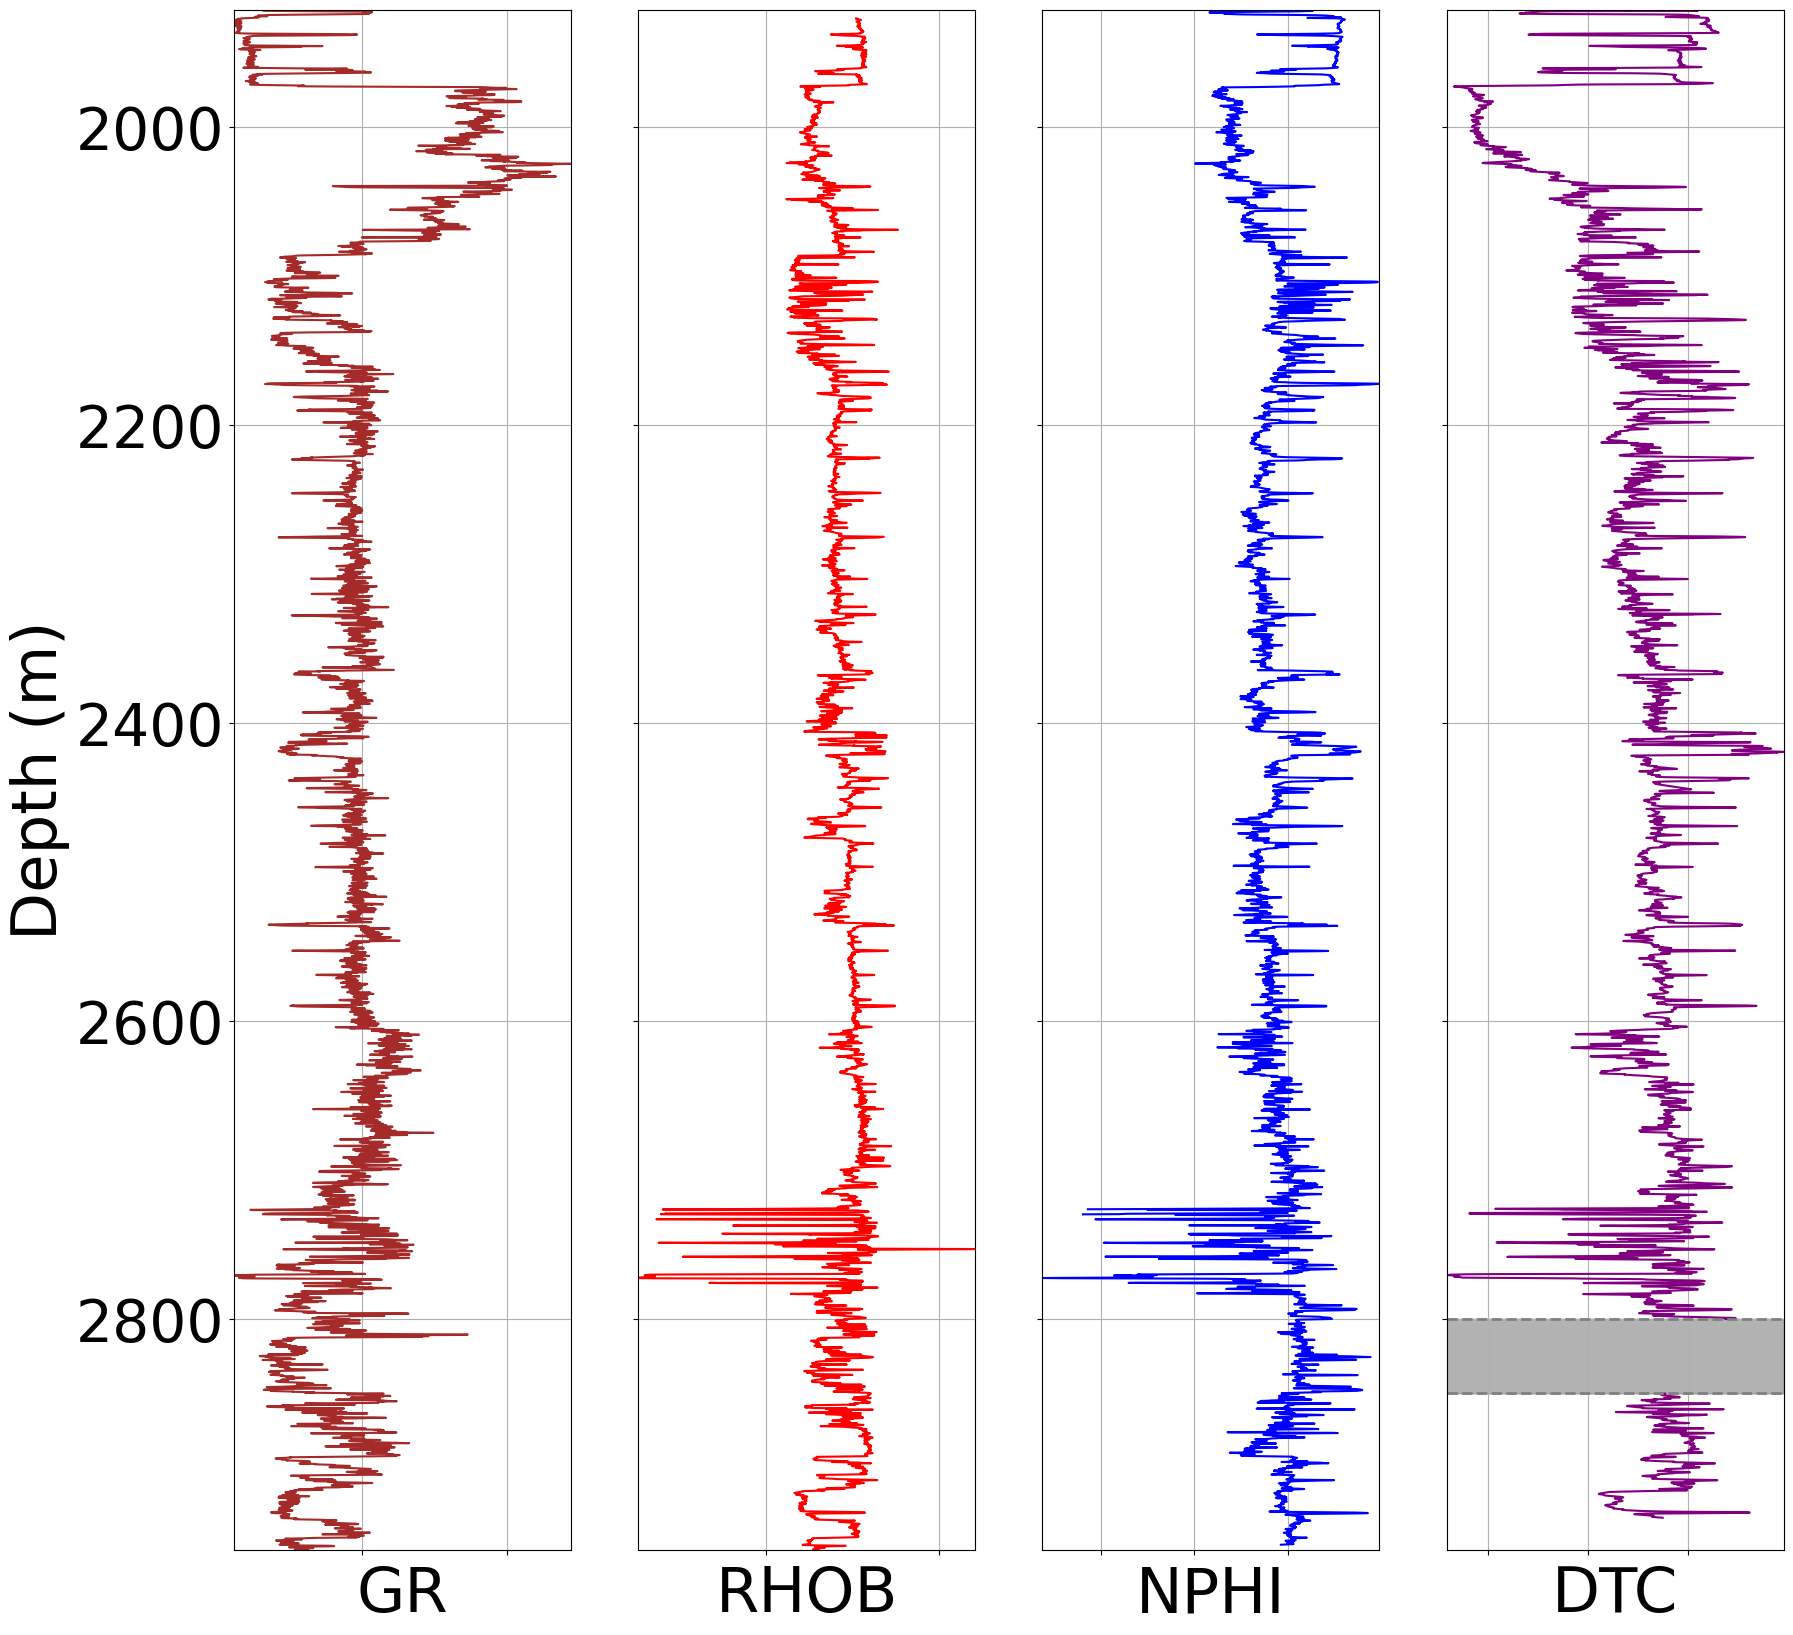

In [16]:
import gc # prevent memory loss
single_well = df_labeled_with_features_sampling.groupby('WELL')

for well_num in df_sample_test.WELL.unique():
    single_well_name = single_well.get_group(well_num)
    single_well_name_reset_index = single_well_name.reset_index(drop=True)
    make_mini_log_plot_without_lith(single_well_name_reset_index)
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()